## <b> Capstone Project: Battle of the Neighbourhoods (Final Assignment IBM Data Science Course)<b>

    
## Table of contents
* [1. Introduction: Business Problem](#introduction)
* [2. Data](#data)
* [3. Methodology](#methodology)
* [4. Analysis](#analysis)
* [5. Results and Discussion](#results)
* [6. Conclusion](#conclusion)


## 1. Introduction: Business Problem <a name="introduction"></a>

In this project we will try to find an optimal location for an Indian restaurant. Specifically, this report will be targeted to stakeholders interested in opening an **Indian restaurant** in **Toronto**, Canada.

Since the highest population of Indian people in Canada is in Toronto, here is on the one hand the most potential guests but on the other hand there is also the highest competition. Cause there are lots of restaurants in Toronto we will try to detect **locations that are not already crowded with Indian restaurants, but has a high population of Indian people.** Thus we expect that this is a smart business plan.

In this analysiy we try to generate a few most promissing neighborhoods based on this criteria. Advantages of each area will then be clearly expressed so that best possible final location can be chosen by stakeholders.

#### Target Audience: 
 Business personnel who wants to invest or open an Indian restaurant in Toronto. This analysis will be a comprehensive guide to start or expand restaurants targeting the Indian crowd.
    Freelancer who loves to have their own restaurant as a side business. This analysis will give an idea, how beneficial it is to open a restaurant and what are the pros and cons of this business.
    Indian crowd who wants to find neighborhoods with lots of option for Indian restaurants.

## 2. Data <a name="data"></a>

#### 2.1 Data Sources

a) Most important are data about the neighborhoods in Toronto. Therefore we use the Wikipedia page “List of Postal code of Canada: M” (https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M), where are all neighborhoods and boroughs listed.

b) In addition we need the longitudes and latitudes of the neighborhoods. The geographical coordinates we find in a csv file here: “https://cocl.us/Geospatial_data”

c) As described above we need information about the distribution of indian population in Toronto. The Wikipedia page “Demographics of Toronto” (https://en.m.wikipedia.org/wiki/Demographics_of_Toronto#Ethnic_diversity) is appropriated. Using this page I’m going to identify the neighborhoods which are densely populated with Indians as it might be helpful in identifying the suitable neighborhood to open a new Indian restaurant.

d) Furthermore we need the number of Indian restaurants in the neighborhoods. This information we can get by using the Foursquare’s explore API.
From Foursquare API (https://developer.foursquare.com/docs), we retrieve name, category, latitude and longitude for each venue.
Name: The name of the venue.


### 2.2 Data Cleaning and Wrangling
####  Web Scraping the data from the Wikipedia Website and creating the dataframe
Scraped the following Wikipedia page, “List of Postal code of Canada: M” in order to obtain the data about the Toronto & the Neighborhoods in it.

Dataframe will consist of three columns: PostalCode, Borough, and Neighborhood
Only the cells that have an assigned borough will be processed. Borough that is not assigned are ignored. More than one neighborhood can exist in one postal code area. If a borough but a no assigned neighborhood, then the neighborhood will be the same as the borough.


First we install and import necessary libaries

In [1]:
!pip install wikipedia
!pip install beautifulsoup4
!pip install folium
!pip install geopy # uncomment this line if you haven't completed the Foursquare API lab
print("Libary is installed")

import pandas as pd
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.style.use('ggplot') # optional: for ggplot-like style

import folium

import wikipedia as wp

import urllib.request
from bs4 import BeautifulSoup

from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

  Stored in directory: /home/dsxuser/.cache/pip/wheels/87/2a/18/4e471fd96d12114d16fe4a446d00c3b38fb9efcb744bd31f4a
Successfully built wikipedia
     |████████████████████████████████| 102kB 7.8MB/s ta 0:00:011
Libary is installed


Web Scraping the data from the Wikipedia Website

In [4]:
url = "https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M"
page = urllib.request.urlopen(url)

soup = BeautifulSoup(page)

print(soup.prettify())

<!DOCTYPE html>
<html class="client-nojs" dir="ltr" lang="en">
 <head>
  <meta charset="utf-8"/>
  <title>
   List of postal codes of Canada: M - Wikipedia
  </title>
  <script>
   document.documentElement.className="client-js";RLCONF={"wgBreakFrames":!1,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgRequestId":"XrRJvgpAEKcAAI@-EI0AAAAQ","wgCSPNonce":!1,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":!1,"wgNamespaceNumber":0,"wgPageName":"List_of_postal_codes_of_Canada:_M","wgTitle":"List of postal codes of Canada: M","wgCurRevisionId":955414546,"wgRevisionId":955414546,"wgArticleId":539066,"wgIsArticle":!0,"wgIsRedirect":!1,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["Articles with short description","Communications in Ontario","Postal codes in Canada","Toronto","Ontario

Transfer to Pandas Dataframe: First Step: Transfer the values in to lists for each column

In [5]:
# Find the right table tag in the HTML Code
all_tables=soup.find_all("table")
right_table=soup.find('table', class_='wikitable sortable')

# Transfer of the values in lists for each of the 3 column (=A;B;C)
A=[]
B=[]
C=[]

for row in right_table.findAll('tr'):
    cells=row.findAll('td')
    if len(cells)==3:
        A.append(cells[0].find(text=True)[0:-1])
        B.append(cells[1].find(text=True)[0:-1])
        C.append(cells[2].find(text=True)[0:-1])

Second Step: Transfer of the lists in a dataframe

In [6]:
column_names=['PostalCode', 'Borough', 'Neighborhood']

neighborhoods = pd.DataFrame(columns=column_names)

neighborhoods['PostalCode']=A
neighborhoods['Borough']=B
neighborhoods['Neighborhood']=C

# Delete Rows with "Not assigned" Boroughs
neighborhoods = neighborhoods[neighborhoods["Borough"]!='Not assigned']

# Replace "/" in Neoghborhoods with ","
neighborhoods["Neighborhood"] =neighborhoods["Neighborhood"].str.replace(" /", ",", regex=False)

neighborhoods.head()

,PostalCode,Borough,Neighborhood
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,"Regent Park, Harbourfront"
5,M6A,North York,"Lawrence Manor, Lawrence Heights"
6,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government"


Prove if there are "Not Assigned" Neighborhoods:

In [7]:
# There is no Not Assigned Neighborhood anymore
neighborhoods[neighborhoods["Neighborhood"]=='']

,PostalCode,Borough,Neighborhood


In [8]:
print('The dataframe has {} boroughs and {} neighborhoods.'.format(
        len(neighborhoods['Borough'].unique()),
        neighborhoods.shape[0]
    )
)

The dataframe has 10 boroughs and 103 neighborhoods.


Import of the geographical coordinates

In [9]:
csv_path = 'https://cocl.us/Geospatial_data/Geospatial_Coordinates.csv'
df_loc = pd.read_csv(csv_path)    

In [10]:
df_loc.columns=['PostalCode','Latitude','Longitude']
df_loc.head()

,PostalCode,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476


Merge of both dataframes by matching on the postal code.:

In [11]:
neighborhoods=neighborhoods.merge(df_loc)
neighborhoods.head()

,PostalCode,Borough,Neighborhood,Latitude,Longitude
0,M3A,North York,Parkwoods,43.753259,-79.329656
1,M4A,North York,Victoria Village,43.725882,-79.315572
2,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636
3,M6A,North York,"Lawrence Manor, Lawrence Heights",43.718518,-79.464763
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494
5,M9A,Etobicoke,Islington Avenue,43.667856,-79.532242
6,M1B,Scarborough,"Malvern, Rouge",43.806686,-79.194353
7,M3B,North York,Don Mills,43.745906,-79.352188
8,M4B,East York,"Parkview Hill, Woodbine Gardens",43.706397,-79.309937
9,M5B,Downtown Toronto,"Garden District, Ryerson",43.657162,-79.378937


Let's get the geographical coordinates of Toronto.

In [13]:
address = 'Toronto, CA'

geolocator = Nominatim(user_agent="toronto_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Toronto are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Toronto are 43.6534817, -79.3839347.


### Indian Population in Toronto
Next we extract the information about the population in each riding of Toronto. Later we will assgin the ridings to the neighborhoods.

In [15]:
# overall population distribution from Wiki
html = wp.page("Demographics of Toronto").html().encode("UTF-8")

Toronto & East York population distribution by ethnicity:

In [68]:
TEY_population_df = pd.read_html(html, header = 0)[12]
TEY_population_df = TEY_population_df.rename(columns={'%':'Ethnic Origin 1 in %', 
                                                      '%.1':'Ethnic Origin 2 in %',
                                                     '%.2':'Ethnic Origin 3 in %',
                                                     '%.3':'Ethnic Origin 4 in %',
                                                     '%.4':'Ethnic Origin 5 in %',
                                                     '%.5':'Ethnic Origin 6 in %',
                                                     '%.6':'Ethnic Origin 7 in %',
                                                     '%.7':'Ethnic Origin 8 in %'})
TEY_population_df

,Riding,Population,Ethnic Origin #1,Ethnic Origin 1 in %,Ethnic Origin #2,Ethnic Origin 2 in %,Ethnic Origin #3,Ethnic Origin 3 in %,Ethnic Origin #4,Ethnic Origin 4 in %,Ethnic Origin #5,Ethnic Origin 5 in %,Ethnic Origin #6,Ethnic Origin 6 in %,Ethnic Origin #7,Ethnic Origin 7 in %,Ethnic Origin #8,Ethnic Origin 8 in %,Ethnic Origin #9,%.8
0,Spadina-Fort York,114315,English,16.4,Chinese,16.0,Irish,14.6,Canadian,14.0,Scottish,13.2,French,7.70,German,7.6,NaN,NaN,NaN,NaN
1,Beaches-East York,108435,English,24.2,Irish,19.9,Canadian,19.7,Scottish,18.9,French,8.7,German,8.40,NaN,NaN,NaN,NaN,NaN,NaN
2,Davenport,107395,Portuguese,22.7,English,13.6,Canadian,12.8,Irish,11.5,Italian,11.1,Scottish,11.00,NaN,NaN,NaN,NaN,NaN,NaN
3,Parkdale-High Park,106445,English,22.3,Irish,20.0,Scottish,18.7,Canadian,16.1,German,9.8,French,8.88,Polish,8.5,NaN,NaN,NaN,NaN
4,Toronto-Danforth,105395,English,22.9,Irish,19.5,Scottish,18.7,Canadian,18.4,Chinese,13.8,French,8.86,German,8.8,Greek,7.3,NaN,NaN
5,Toronto-St. Paul's,104940,English,18.5,Canadian,16.1,Irish,15.2,Scottish,14.8,Polish,10.3,German,7.90,Russian,7.7,Italian,7.3,French,7.2
6,University-Rosedale,100520,English,20.6,Irish,16.6,Scottish,16.3,Canadian,15.2,Chinese,14.7,German,8.70,French,7.7,Italian,7.4,NaN,NaN
7,Toronto Centre,99590,English,15.7,Canadian,13.7,Irish,13.4,Scottish,12.6,Chinese,12.5,French,7.20,NaN,NaN,NaN,NaN,NaN,NaN


North York population distribution by ethnicity:

In [69]:
NY_population_df = pd.read_html(html, header = 0)[13]
NY_population_df = NY_population_df.rename(columns={'%':'Ethnic Origin 1 in %', 
                                                      '%.1':'Ethnic Origin 2 in %',
                                                     '%.2':'Ethnic Origin 3 in %',
                                                     '%.3':'Ethnic Origin 4 in %',
                                                     '%.4':'Ethnic Origin 5 in %',
                                                     '%.5':'Ethnic Origin 6 in %',
                                                     '%.6':'Ethnic Origin 7 in %',
                                                     '%.7':'Ethnic Origin 8 in %',
                                                     '%.8':'Ethnic Origin 9 in %'})
NY_population_df

,Riding,Population,Ethnic Origin #1,Ethnic Origin 1 in %,Ethnic Origin #2,Ethnic Origin 2 in %,Ethnic Origin #3,Ethnic Origin 3 in %,Ethnic Origin #4,Ethnic Origin 4 in %,Ethnic Origin #5,Ethnic Origin 5 in %,Ethnic Origin #6,Ethnic Origin 6 in %,Ethnic Origin #7,Ethnic Origin 7 in %,Ethnic Origin #8,Ethnic Origin 8 in %
0,Willowdale,117405,Chinese,25.9,Iranian,12.1,Korean,10.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Eglinton-Lawrence,112925,Canadian,14.7,English,12.6,Polish,12.0,Filipino,11.0,Scottish,9.7,Italian,9.5,Irish,9.2,Russian,8.4
2,Don Valley North,109060,Chinese,32.4,East Indian,7.3,Iranian,7.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Humber River-Black Creek,107725,Italian,12.8,East Indian,9.2,Jamaican,8.5,Vietnamese,8.0,Canadian,7.4,NaN,NaN,NaN,NaN,NaN,NaN
4,York Centre,103760,Filipino,17.0,Italian,13.4,Russian,9.5,Canadian,8.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Don Valley West,101790,English,19.2,Canadian,15.1,Scottish,14.9,Irish,14.2,Chinese,11.2,NaN,NaN,NaN,NaN,NaN,NaN
6,Don Valley East,93170,East Indian,10.6,Canadian,10.4,English,10.1,Chinese,8.9,Irish,8.1,Scottish,8.0,Filipino,7.8,NaN,NaN


Scarborough population distribution by ethnicity:

In [70]:
#SCARBOROUGH population distribution by ethnicity
SCAR_population_df = pd.read_html(html, header = 0)[14]
SCAR_population_df = SCAR_population_df.rename(columns={'%':'Ethnic Origin 1 in %', 
                                                      '%.1':'Ethnic Origin 2 in %',
                                                     '%.2':'Ethnic Origin 3 in %',
                                                     '%.3':'Ethnic Origin 4 in %',
                                                     '%.4':'Ethnic Origin 5 in %',
                                                     '%.5':'Ethnic Origin 6 in %',
                                                     '%.6':'Ethnic Origin 7 in %',
                                                     '%.7':'Ethnic Origin 8 in %'})
SCAR_population_df

,Riding,Population,Ethnic Origin #1,Ethnic Origin 1 in %,Ethnic Origin #2,Ethnic Origin 2 in %,Ethnic Origin #3,Ethnic Origin 3 in %,Ethnic Origin #4,Ethnic Origin 4 in %,Ethnic Origin #5,Ethnic Origin 5 in %,Ethnic Origin #6,Ethnic Origin 6 in %,Ethnic Origin #7,Ethnic Origin 7 in %,Ethnic Origin #8,Ethnic Origin 8 in %
0,Scarborough Centre,110450,Filipino,13.1,East Indian,12.2,Canadian,11.2,Chinese,10.7,English,7.8,Sri Lankan,7.0,NaN,NaN,NaN,NaN
1,Scarborough Southwest,108295,Canadian,16.2,English,14.3,Irish,11.5,Scottish,10.9,Filipino,9.5,East Indian,8.2,Chinese,7.2,NaN,NaN
2,Scarborough-Agincourt,104225,Chinese,47.0,East Indian,7.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Scarborough-Rouge Park,101445,East Indian,16.7,Canadian,11.8,Sri Lankan,11.1,English,9.8,Filipino,9.3,Jamaican,8.4,Scottish,7.2,Irish,7.0
4,Scarborough-Guildwood,101115,East Indian,18.0,Canadian,11.6,English,9.7,Filipino,8.5,Sri Lankan,7.8,Chinese,7.1,Scottish,7.0,NaN,NaN
5,Scarborough North,97610,Chinese,46.6,East Indian,11.8,Sri Lankan,9.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Etobicoke & York population distribution by ethnicity:

In [72]:
ETY_population_df = pd.read_html(html, header = 0)[15]
ETY_population_df = ETY_population_df.rename(columns={'%':'Ethnic Origin 1 in %', 
                                                      '%.1':'Ethnic Origin 2 in %',
                                                     '%.2':'Ethnic Origin 3 in %',
                                                     '%.3':'Ethnic Origin 4 in %',
                                                     '%.4':'Ethnic Origin 5 in %',
                                                     '%.5':'Ethnic Origin 6 in %',
                                                     '%.6':'Ethnic Origin 7 in %',
                                                     '%.7':'Ethnic Origin 8 in %'})
ETY_population_df

,Riding,Population,Ethnic Origin #1,Ethnic Origin 1 in %,Ethnic Origin #2,Ethnic Origin 2 in %,Ethnic Origin #3,Ethnic Origin 3 in %,Ethnic Origin #4,Ethnic Origin 4 in %,Ethnic Origin #5,Ethnic Origin 5 in %,Ethnic Origin #6,Ethnic Origin 6 in %,Ethnic Origin #7,Ethnic Origin 7 in %,Ethnic Origin #8,Ethnic Origin 8 in %
0,Etobicoke-Lakeshore,127520,English,17.1,Canadian,15.9,Irish,14.4,Scottish,13.5,Polish,9.2,Italian,9.1,Ukrainian,7.6,German,7.1
1,Etobicoke North,116960,East Indian,22.2,Canadian,7.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Etobicoke Centre,116055,Italian,15.1,English,14.3,Canadian,12.1,Irish,10.8,Scottish,10.4,Ukrainian,8.1,Polish,7.4,NaN,NaN
3,York South-Weston,115130,Portuguese,14.5,Italian,12.8,Canadian,8.7,Jamaican,8.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Explore Neighborhoods in Toronto Central
Get the venues in Toronto Central

In [73]:
CLIENT_ID = 'ECV2ZR1MNAIXU2XY0MAJ4XMPBBETCF1VEUVHJDJWKN5P4YUM' # your Foursquare ID
CLIENT_SECRET = 'XABLALD1Z24CXTHJOGXXTCDANHLVFOJAIUQBK0BDFKGSQRTJ' # your Foursquare Secret
VERSION = '20180604'  


In [74]:
def getNearbyVenues(names, latitudes, longitudes, radius, Limit):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            Limit)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [75]:
RADIUS=500
LIMIT=100
toronto_venues = getNearbyVenues(names=neighborhoods['Neighborhood'],
                                   latitudes=neighborhoods['Latitude'],
                                   longitudes=neighborhoods['Longitude'],
                                   radius=RADIUS,  
                                   Limit=LIMIT
                                  )


Parkwoods
Victoria Village
Regent Park, Harbourfront
Lawrence Manor, Lawrence Heights
Queen's Park, Ontario Provincial Government
Islington Avenue
Malvern, Rouge
Don Mills
Parkview Hill, Woodbine Gardens
Garden District, Ryerson
Glencairn
West Deane Park, Princess Gardens, Martin Grove, Islington, Cloverdale
Rouge Hill, Port Union, Highland Creek
Don Mills
Woodbine Heights
St. James Town
Humewood-Cedarvale
Eringate, Bloordale Gardens, Old Burnhamthorpe, Markland Wood
Guildwood, Morningside, West Hill
The Beaches
Berczy Park
Caledonia-Fairbanks
Woburn
Leaside
Central Bay Street
Christie
Cedarbrae
Hillcrest Village
Bathurst Manor, Wilson Heights, Downsview North
Thorncliffe Park
Richmond, Adelaide, King
Dufferin, Dovercourt Village
Scarborough Village
Fairview, Henry Farm, Oriole
Northwood Park, York University
East Toronto
Harbourfront East, Union Station, Toronto Islands
Little Portugal, Trinity
Kennedy Park, Ionview, East Birchmount Park
Bayview Village
Downsview
The Danforth West, Ri

In [76]:
toronto_venues.head()
toronto_grouped=toronto_venues.drop(['Neighborhood Latitude','Neighborhood Longitude','Venue Latitude','Venue Longitude','Venue Category'],axis=1).groupby('Neighborhood').count()

Let's find out how many unique categories can be curated from all the returned venues

In [77]:
print('There are {} uniques categories.'.format(len(toronto_venues['Venue Category'].unique())))

There are 262 uniques categories.


There are 262 unique categories in which "Indian Restaurant" is one of them. We will do one hot encoding for getting dummies of venue category. So that we will calculate mean of all venue groupby there neighborhoods.

In [78]:
# one hot encoding
toronto_onehot = pd.get_dummies(toronto_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
toronto_onehot['Neighborhood'] = toronto_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [toronto_onehot.columns[-1]] + list(toronto_onehot.columns[:-1])
toronto_onehot = toronto_onehot[fixed_columns]

toronto_grouped = toronto_onehot.groupby('Neighborhood').mean().reset_index()
toronto_grouped.head()

,Neighborhood,Yoga Studio,Accessories Store,Afghan Restaurant,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,...,Train Station,Turkish Restaurant,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Warehouse Store,Wine Bar,Wings Joint,Women's Store
0,Agincourt,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0
1,"Alderwood, Long Branch",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0
2,"Bathurst Manor, Wilson Heights, Downsview North",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0
3,Bayview Village,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0
4,"Bedford Park, Lawrence Manor East",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0


# 3. Mehtodology <a name="mehtodology"></a>

In this project we will direct our efforts on detecting areas of Toronto that have low restaurant density, particularly those with low number of Indian restaurants.

In first step we have collected the required data: 
We have collected all data about the neighborhoods, especially names and longitudes/latitudes. 
Next we have collected the population data of the ridings of Toronto. Cause we are interested in neighborhoods and not in ridings we have to match the ridings to the neighborhoods they belong to.
The location and type (category) of every venue we can find in a radius of 500m from the centre of each neighborhood using Foursquare.

Second step in our analysis will be calculation and exploration of 'Indian restaurant density' across Torontos neighborhoods. We do this by creating a map, where the location of restaurants near to each other are grouped. Additionally, we take a look in the neighborhoods with Indian population. Cause this neighborhoods we are interested in, assuming that there a lot of potential guests for our restaurant.

In third and final step we will create clusters of locations that meet some basic requirements established in discussion with stakeholders: we will take into consideration locations with high Indian population, but less restaurants and search for optimal location by stakeholders. We use kmean-clustering, cause we have unlabeled data. The optimal number of clusters we determine by using the elbow method.  To examine the clusters we take a deeper look into the resulting clusters. Then we decide what locations we can recommend for opening an Indian restaurant.


# 4. Analysis <a name="analysis"></a>



#### Create map of Toronto neighborhoods

In [14]:
# create map of Toronto using latitude and longitude values
map_toronto = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, borough, neighborhood in zip(neighborhoods['Latitude'], neighborhoods['Longitude'], neighborhoods['Borough'], neighborhoods['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_toronto)  
    
map_toronto

#### Relationship between neighborhood and Indian restaurants
First we will extract the Neighborhood and Indian Restaurant column from the above toronto dataframe for further analysis:


In [79]:
toronto_part = toronto_grouped[['Neighborhood', 'Indian Restaurant']]
toronto_part

,Neighborhood,Indian Restaurant
0,Agincourt,0.000000
1,"Alderwood, Long Branch",0.000000
2,"Bathurst Manor, Wilson Heights, Downsview North",0.000000
3,Bayview Village,0.000000
4,"Bedford Park, Lawrence Manor East",0.043478
5,Berczy Park,0.000000
6,"Birch Cliff, Cliffside West",0.000000
7,"Brockton, Parkdale Village, Exhibition Place",0.000000
8,Business reply mail Processing Centre,0.000000
9,"CN Tower, King and Spadina, Railway Lands, Har...",0.000000


In [115]:
toronto_merged = pd.merge(neighborhoods, toronto_part, on='Neighborhood')
toronto_merged.sort_values(by ='Indian Restaurant', ascending=False)

,PostalCode,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,Indian Population,Indian Restaurant
65,M1P,Scarborough,"Dorset Park, Wexford Heights, Scarborough Town...",43.757410,-79.273304,3,13474.900000,0.400000
29,M4H,East York,Thorncliffe Park,43.705369,-79.349372,0,0.000000,0.111111
74,M5R,Central Toronto,"The Annex, North Midtown, Yorkville",43.672710,-79.405678,0,0.000000,0.043478
55,M5M,North York,"Bedford Park, Lawrence Manor East",43.733283,-79.419750,0,0.000000,0.043478
79,M4S,Central Toronto,Davisville,43.704324,-79.388790,0,0.000000,0.030303
41,M4K,East Toronto,"The Danforth West, Riverdale",43.679557,-79.352188,0,0.000000,0.023810
96,M4X,Downtown Toronto,"St. James Town, Cabbagetown",43.667967,-79.367675,0,0.000000,0.020408
24,M5G,Downtown Toronto,Central Bay Street,43.657952,-79.387383,0,0.000000,0.015873
99,M4Y,Downtown Toronto,Church and Wellesley,43.665860,-79.383160,0,0.000000,0.013514
36,M5J,Downtown Toronto,"Harbourfront East, Union Station, Toronto Islands",43.640816,-79.381752,0,0.000000,0.010000


For identifying the dense of Indian restaurants in the neighborhoods we visualize the distribution of Indian Neighborhoods in the following map

In [82]:
from folium import plugins
# create map of  Toronto using latitude and longitude values
map_toronto = folium.Map(location=[latitude, longitude], zoom_start=11)
# instantiate a mark cluster object for the incidents in the dataframe
incidents = plugins.MarkerCluster().add_to(map_toronto)
# add markers to map
for lat, lng, label in zip(toronto_merged['Latitude'], toronto_merged['Longitude'], toronto_merged['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(incidents)  
    
map_toronto

As we can see there is a higher dense of Indian restaurants in the centre of Toronto, whereas the other areas has a much smaller dense.

#### Relationship between neighborhood and Indian population

Next we merge all the population table with the ethnic percentage by neighborhood

In [83]:
pop_ethnic_df = pd.concat([TEY_population_df, NY_population_df, SCAR_population_df, ETY_population_df],axis=0)
pop_ethnic_df.reset_index()


pop_ethnic_df = pop_ethnic_df[['Riding', 'Population','Ethnic Origin #1', 'Ethnic Origin 1 in %','Ethnic Origin #2', 'Ethnic Origin 2 in %',
                               'Ethnic Origin #3','Ethnic Origin 3 in %','Ethnic Origin #4', 'Ethnic Origin 4 in %','Ethnic Origin #5','Ethnic Origin 5 in %', 
                               'Ethnic Origin #6','Ethnic Origin 6 in %','Ethnic Origin #7', 'Ethnic Origin 7 in %','Ethnic Origin #8', 'Ethnic Origin 8 in %',
                              ]]
pop_ethnic_df

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:3: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  app.launch_new_instance()


,Riding,Population,Ethnic Origin #1,Ethnic Origin 1 in %,Ethnic Origin #2,Ethnic Origin 2 in %,Ethnic Origin #3,Ethnic Origin 3 in %,Ethnic Origin #4,Ethnic Origin 4 in %,Ethnic Origin #5,Ethnic Origin 5 in %,Ethnic Origin #6,Ethnic Origin 6 in %,Ethnic Origin #7,Ethnic Origin 7 in %,Ethnic Origin #8,Ethnic Origin 8 in %
0,Spadina-Fort York,114315,English,16.4,Chinese,16.0,Irish,14.6,Canadian,14.0,Scottish,13.2,French,7.70,German,7.6,NaN,NaN
1,Beaches-East York,108435,English,24.2,Irish,19.9,Canadian,19.7,Scottish,18.9,French,8.7,German,8.40,NaN,NaN,NaN,NaN
2,Davenport,107395,Portuguese,22.7,English,13.6,Canadian,12.8,Irish,11.5,Italian,11.1,Scottish,11.00,NaN,NaN,NaN,NaN
3,Parkdale-High Park,106445,English,22.3,Irish,20.0,Scottish,18.7,Canadian,16.1,German,9.8,French,8.88,Polish,8.5,NaN,NaN
4,Toronto-Danforth,105395,English,22.9,Irish,19.5,Scottish,18.7,Canadian,18.4,Chinese,13.8,French,8.86,German,8.8,Greek,7.3
5,Toronto-St. Paul's,104940,English,18.5,Canadian,16.1,Irish,15.2,Scottish,14.8,Polish,10.3,German,7.90,Russian,7.7,Italian,7.3
6,University-Rosedale,100520,English,20.6,Irish,16.6,Scottish,16.3,Canadian,15.2,Chinese,14.7,German,8.70,French,7.7,Italian,7.4
7,Toronto Centre,99590,English,15.7,Canadian,13.7,Irish,13.4,Scottish,12.6,Chinese,12.5,French,7.20,NaN,NaN,NaN,NaN
0,Willowdale,117405,Chinese,25.9,Iranian,12.1,Korean,10.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Eglinton-Lawrence,112925,Canadian,14.7,English,12.6,Polish,12.0,Filipino,11.0,Scottish,9.7,Italian,9.50,Irish,9.2,Russian,8.4



From the above dataframe we can pickout the neighborhoods with highest Indian population percentage by using the below given method.


In [84]:
#Filtering the riding with Indian ethnic crowd
temp = pop_ethnic_df.loc[(pop_ethnic_df['Ethnic Origin #1'] == 'East Indian')| 
                                      (pop_ethnic_df['Ethnic Origin #2'] == 'East Indian')|
                                      (pop_ethnic_df['Ethnic Origin #3'] == 'East Indian')|
                                      (pop_ethnic_df['Ethnic Origin #4'] == 'East Indian')|
                                      (pop_ethnic_df['Ethnic Origin #5'] == 'East Indian')|
                                      (pop_ethnic_df['Ethnic Origin #6'] == 'East Indian')|
                                      (pop_ethnic_df['Ethnic Origin #7'] == 'East Indian')|
                                      (pop_ethnic_df['Ethnic Origin #8'] == 'East Indian')]
pop_indian_df = pd.DataFrame(temp).reset_index()
pop_indian_df.drop('index',axis=1,inplace=True)

pop_indian_df

,Riding,Population,Ethnic Origin #1,Ethnic Origin 1 in %,Ethnic Origin #2,Ethnic Origin 2 in %,Ethnic Origin #3,Ethnic Origin 3 in %,Ethnic Origin #4,Ethnic Origin 4 in %,Ethnic Origin #5,Ethnic Origin 5 in %,Ethnic Origin #6,Ethnic Origin 6 in %,Ethnic Origin #7,Ethnic Origin 7 in %,Ethnic Origin #8,Ethnic Origin 8 in %
0,Don Valley North,109060,Chinese,32.4,East Indian,7.3,Iranian,7.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Humber River-Black Creek,107725,Italian,12.8,East Indian,9.2,Jamaican,8.5,Vietnamese,8.0,Canadian,7.4,NaN,NaN,NaN,NaN,NaN,NaN
2,Don Valley East,93170,East Indian,10.6,Canadian,10.4,English,10.1,Chinese,8.9,Irish,8.1,Scottish,8.0,Filipino,7.8,NaN,NaN
3,Scarborough Centre,110450,Filipino,13.1,East Indian,12.2,Canadian,11.2,Chinese,10.7,English,7.8,Sri Lankan,7.0,NaN,NaN,NaN,NaN
4,Scarborough Southwest,108295,Canadian,16.2,English,14.3,Irish,11.5,Scottish,10.9,Filipino,9.5,East Indian,8.2,Chinese,7.2,NaN,NaN
5,Scarborough-Agincourt,104225,Chinese,47.0,East Indian,7.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Scarborough-Rouge Park,101445,East Indian,16.7,Canadian,11.8,Sri Lankan,11.1,English,9.8,Filipino,9.3,Jamaican,8.4,Scottish,7.2,Irish,7.0
7,Scarborough-Guildwood,101115,East Indian,18.0,Canadian,11.6,English,9.7,Filipino,8.5,Sri Lankan,7.8,Chinese,7.1,Scottish,7.0,NaN,NaN
8,Scarborough North,97610,Chinese,46.6,East Indian,11.8,Sri Lankan,9.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Etobicoke North,116960,East Indian,22.2,Canadian,7.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [85]:
columns_list = pop_indian_df.columns.to_list()
del columns_list[0:1]
print(columns_list)

['Population', 'Ethnic Origin #1', 'Ethnic Origin 1 in %', 'Ethnic Origin #2', 'Ethnic Origin 2 in %', 'Ethnic Origin #3', 'Ethnic Origin 3 in %', 'Ethnic Origin #4', 'Ethnic Origin 4 in %', 'Ethnic Origin #5', 'Ethnic Origin 5 in %', 'Ethnic Origin #6', 'Ethnic Origin 6 in %', 'Ethnic Origin #7', 'Ethnic Origin 7 in %', 'Ethnic Origin #8', 'Ethnic Origin 8 in %']


In [86]:
#retaining only Indian ethnic percentage & the neighborhood name 
columns_list = pop_indian_df.columns.to_list()
pop_indian_DF_with_percent = pd.DataFrame()
#removing Riding & Population from the column names list
del columns_list[0:1]

for i in range(0,pop_indian_df.shape[0]):
    for j in columns_list:
        if pop_indian_df.at[i, j] == 'East Indian':
            k = columns_list.index(j) + 1
            percent_col = columns_list[k]
            pop_indian_DF_with_percent = pop_indian_DF_with_percent.append({'Riding':pop_indian_df.at[i, 'Riding'], 'Population':pop_indian_df.at[i, 'Population']
                                                                           , 'Ethnicity': pop_indian_df.at[i, j], 'Percentage': pop_indian_df.at[i, percent_col]},ignore_index=True)

pop_indian_DF_with_percent

,Ethnicity,Percentage,Population,Riding
0,East Indian,7.3,109060.0,Don Valley North
1,East Indian,9.2,107725.0,Humber River-Black Creek
2,East Indian,10.6,93170.0,Don Valley East
3,East Indian,12.2,110450.0,Scarborough Centre
4,East Indian,8.2,108295.0,Scarborough Southwest
5,East Indian,7.4,104225.0,Scarborough-Agincourt
6,East Indian,16.7,101445.0,Scarborough-Rouge Park
7,East Indian,18.0,101115.0,Scarborough-Guildwood
8,East Indian,11.8,97610.0,Scarborough North
9,East Indian,22.2,116960.0,Etobicoke North


In [87]:
pop_indian_DF_with_percent['Indian Population'] = (pop_indian_DF_with_percent['Percentage'] * pop_indian_DF_with_percent['Population'])/100
pop_indian_DF_with_percent.drop(columns={'Percentage','Population','Ethnicity'},axis=1, inplace =True)
pop_indian_DF_with_percent.drop_duplicates(keep='first',inplace=True) 
pop_indian_DF_with_percent

,Riding,Indian Population
0,Don Valley North,7961.380
1,Humber River-Black Creek,9910.700
2,Don Valley East,9876.020
3,Scarborough Centre,13474.900
4,Scarborough Southwest,8880.190
5,Scarborough-Agincourt,7712.650
6,Scarborough-Rouge Park,16941.315
7,Scarborough-Guildwood,18200.700
8,Scarborough North,11517.980
9,Etobicoke North,25965.120


In [116]:
pop_indian_DF_with_percent['Indian Population'] .sum()

130440.95499999999

All in alll there are 130k Indian people living in Toronto.

Next we create a bar chart to visualize the number of Indian people in the ridings. In all other ridings there is no Indian population. Don't forget later we assign each riding to the according neighborhood.

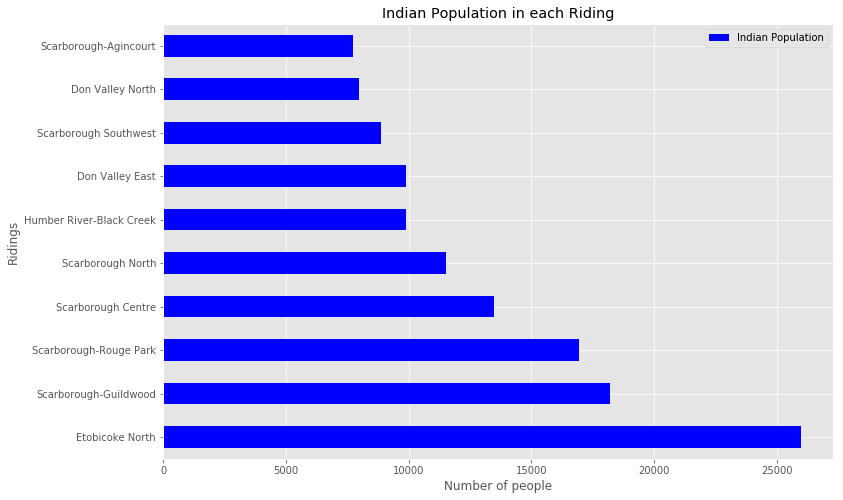

In [103]:
bar_graph = pop_indian_DF_with_percent.sort_values(by='Indian Population', ascending=False)
bar_graph.plot(kind='barh',x='Riding', y='Indian Population',figsize=(12,8), color='blue')
plt.title("Indian Population in each Riding")
plt.xlabel("Number of people")
plt.ylabel("Ridings")
plt.show()

Accordingly to our business idea, these ridings are potential locations for our Indian restaurants. But to make a smart decision we first have to connect the population data with the dense of Indian restaurant data.


### Relationship between Indian poplation and Indian restaurant

Cause the population dataset is assigned to Ridings, but our other datasets use Neighborhoods, we need to replace the Ridings with the belonging Neighboorhoods. Cause there are no tables in the internet, we search for the neighborhoods of the 7 Ridings in wikipedia and assign them to the ridings manually.

In [89]:
rlist=[]
nlist=[]

# Cause the population dataset is assigned to Ridings, but our other datasets use Neighborhoods, we need to replace the Ridings with the belonging Neighboorhoods. Cause there are no tables in the internet, we search for the neighborhoods of the 7 Ridings in wikipedia and assign them to the ridings manually.
rlist.append('Scarborough Centre')
rlist.append('Scarborough Southwest')
rlist.append('Scarborough Southwest')
rlist.append('Scarborough Southwest')
rlist.append('Scarborough-Agincourt')
rlist.append('Scarborough-Agincourt')
rlist.append('Scarborough-Agincourt')
rlist.append('Scarborough-Rouge Park')
rlist.append('Scarborough-Guildwood')
rlist.append('Scarborough-Guildwood')
rlist.append('Scarborough North')
rlist.append('Etobicoke North')
rlist.append('Etobicoke North')

nlist.append('Dorset Park, Wexford Heights, Scarborough Town Centre')
nlist.append('Birch Cliff, Cliffside West')
nlist.append('Golden Mile, Clairlea, Oakridge')
nlist.append('Cliffside, Cliffcrest, Scarborough Village West')
nlist.append('Steeles West, L\'Amoreaux West')
nlist.append('Clarks Corners, Tam O\'Shanter, Sullivan')
nlist.append('Agincourt')
nlist.append('Rouge Hill, Port Union, Highland Creek')
nlist.append('Guildwood, Morningside, West Hill')
nlist.append('Woburn')
nlist.append('Malvern, Rouge')
nlist.append('Kingsview Village, St. Phillips, Martin Grove Gardens, Richview Gardens')
nlist.append('South Steeles, Silverstone, Humbergate, Jamestown, Mount Olive, Beaumond Heights, Thistletown, Albion Gardens')

# Transfer to dataframe:
column_names=['Riding','Neighborhood']
Riding_neighborhood_df = pd.DataFrame(columns=column_names)
Riding_neighborhood_df['Riding']=rlist
Riding_neighborhood_df['Neighborhood']=nlist
Riding_neighborhood_df

,Riding,Neighborhood
0,Scarborough Centre,"Dorset Park, Wexford Heights, Scarborough Town..."
1,Scarborough Southwest,"Birch Cliff, Cliffside West"
2,Scarborough Southwest,"Golden Mile, Clairlea, Oakridge"
3,Scarborough Southwest,"Cliffside, Cliffcrest, Scarborough Village West"
4,Scarborough-Agincourt,"Steeles West, L'Amoreaux West"
5,Scarborough-Agincourt,"Clarks Corners, Tam O'Shanter, Sullivan"
6,Scarborough-Agincourt,Agincourt
7,Scarborough-Rouge Park,"Rouge Hill, Port Union, Highland Creek"
8,Scarborough-Guildwood,"Guildwood, Morningside, West Hill"
9,Scarborough-Guildwood,Woburn


Next we merge the pop_indian_DF_with_percent dataframe containing population information with the Riding_neighborhood_df dataframe.

In [90]:
Neigh_pop = pd.merge(pop_indian_DF_with_percent, Riding_neighborhood_df, on='Riding')

# Cause there are more than one neighborhood assigned to a riding, we have to correct the population data. We can do this by dividing the population data with the number of neighborhoods in a riding
# thus we add the number of assigned neighborhoods to the ridings:
Neigh_pop_number_per_riding=pd.DataFrame(Neigh_pop['Riding'].value_counts()).reset_index()
Neigh_pop_number_per_riding.columns=['Riding','Number_of_Neighborhoods']

# Merge this to the Neigh_pop Dataframe:
Neigh_pop=Neigh_pop.merge(Neigh_pop_number_per_riding, on='Riding')
#Correction of the Population Data by Dividing with the Number_of_Neighborhoods per Riding
Neigh_pop['Indian Population']=Neigh_pop['Indian Population']/Neigh_pop['Number_of_Neighborhoods']

Neigh_pop.drop(columns=['Riding', 'Number_of_Neighborhoods'],inplace =True)
Neigh_pop=Neigh_pop[['Neighborhood', 'Indian Population']]
Neigh_pop

,Neighborhood,Indian Population
0,"Dorset Park, Wexford Heights, Scarborough Town...",13474.900000
1,"Birch Cliff, Cliffside West",2960.063333
2,"Golden Mile, Clairlea, Oakridge",2960.063333
3,"Cliffside, Cliffcrest, Scarborough Village West",2960.063333
4,"Steeles West, L'Amoreaux West",2570.883333
5,"Clarks Corners, Tam O'Shanter, Sullivan",2570.883333
6,Agincourt,2570.883333
7,"Rouge Hill, Port Union, Highland Creek",16941.315000
8,"Guildwood, Morningside, West Hill",9100.350000
9,Woburn,9100.350000


To finish our dataframe for the analysis we combine all data for our decision in one dataframe. So we have to add the Indian Restaurant column.

In [114]:
pop_merged_restaurant_percent = pd.merge(Neigh_pop, toronto_part, on='Neighborhood', how='outer')
pop_merged_restaurant_percent = pd.merge(pop_merged_restaurant_percent, neighborhoods[['Neighborhood']].set_index('Neighborhood'), on='Neighborhood', how='outer')
pop_merged_restaurant_percent=pop_merged_restaurant_percent.fillna(0)

pop_merged_restaurant_percent.head()

,Neighborhood,Indian Population,Indian Restaurant
0,"Dorset Park, Wexford Heights, Scarborough Town...",13474.900000,0.4
1,"Birch Cliff, Cliffside West",2960.063333,0.0
2,"Golden Mile, Clairlea, Oakridge",2960.063333,0.0
3,"Cliffside, Cliffcrest, Scarborough Village West",2960.063333,0.0
4,"Steeles West, L'Amoreaux West",2570.883333,0.0


Unfortunately most of the neighborhoods have not an Indian community and also a Indian restaurants, so we have not enough information to infer a connection between both variables.
On the other hand that are good news for our business plan, cause that means we have less competition in the neighborhoods with high dense of Indian people.

### Predictive Modeling

In the predictive modelling we are going to use clustering techniques since this is analysis of unlabelled data. K-Means clustering is used to perform the analysis of the data

#### Clustering Neighborhoods of Toronto:
First step in K-means clustering is to identify best K value meaning the number of clusters in a given dataset. To do so we are going to use the elbow method on the Toronto dataset with Indian restaurant percentage (i.e. toronto_merged dataframe).


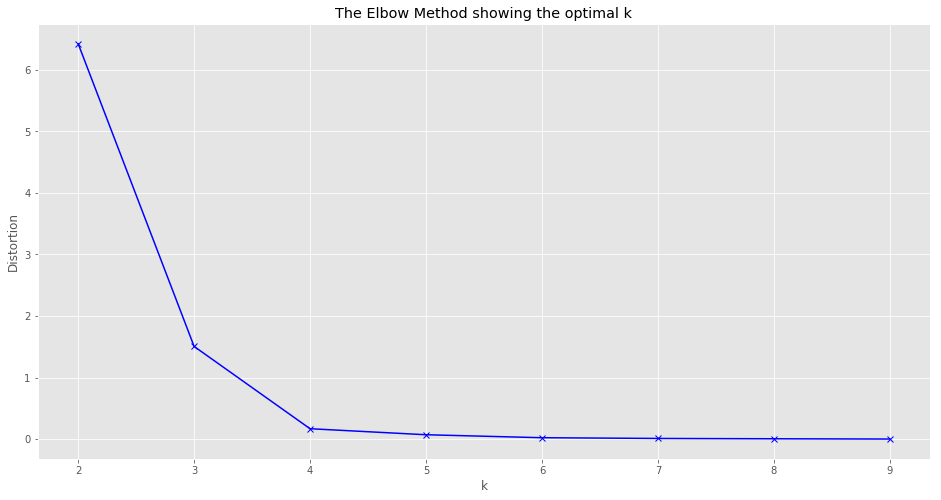

In [106]:
# import k-means from clustering stage
from sklearn.cluster import KMeans

toronto_part_clustering = pop_merged_restaurant_percent.drop('Neighborhood', 1)
#Standardization
toronto_part_clustering['Indian Population']=toronto_part_clustering['Indian Population']/toronto_part_clustering['Indian Population'].max()
distortions = []

K = range(2,10)
for k in K:
        kmeanModel = KMeans(n_clusters=k, max_iter=1000).fit(toronto_part_clustering)
        distortions.append(kmeanModel.inertia_)
        labels = kmeanModel.labels_

plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')         # Silhouette Score
plt.title('The Elbow Method showing the optimal k')
plt.show()


#### After analysing using elbow method using distortion score for each K value, looks like K = 4 is the best value.
Clustering the Toronto Neighborhood Using K-Means with K = 4


In [93]:
kclusters = 4
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(toronto_part_clustering)

In [94]:
#sorted_neighborhoods_venues.drop(['Cluster Labels'],axis=1,inplace=True)
pop_merged_restaurant_percent.insert(0, 'Cluster Labels', kmeans.labels_)
toronto_merged = neighborhoods

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
toronto_merged = toronto_merged.join(pop_merged_restaurant_percent.set_index('Neighborhood'), on='Neighborhood')

toronto_merged['Cluster Labels'].astype(int)
toronto_merged.head()

,PostalCode,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,Indian Population,Indian Restaurant
0,M3A,North York,Parkwoods,43.753259,-79.329656,0,0.0,0.0
1,M4A,North York,Victoria Village,43.725882,-79.315572,0,0.0,0.0
2,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636,0,0.0,0.0
3,M6A,North York,"Lawrence Manor, Lawrence Heights",43.718518,-79.464763,0,0.0,0.0
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494,0,0.0,0.0


Let us see the clusters visually on the map with the help of Folium.


In [95]:
import matplotlib.cm as cm
import matplotlib.colors as colors

map_clusters = folium.Map(location=[latitude, longitude], zoom_start=10, width='90%', height='70%')

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(toronto_merged['Latitude'], toronto_merged['Longitude'], toronto_merged['Neighborhood'], toronto_merged['Cluster Labels'].astype(int)):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
map_clusters

### Examing the Clusters:

**Cluster 0:** contains all the neighborhoods which has no Indian Population and sparse number of Indian restaurants. It is shown in red color in the map and represents about 75% of all neighborhoods.

In [96]:
#Cluster 0
toronto_merged.loc[toronto_merged['Cluster Labels'] == 0].describe()

,Latitude,Longitude,Cluster Labels,Indian Population,Indian Restaurant
count,106.000000,106.000000,106.0,106.0,106.000000
mean,43.704643,-79.420427,0.0,0.0,0.002943
std,0.049697,0.081627,0.0,0.0,0.012963
min,43.602414,-79.615819,0.0,0.0,0.000000
25%,43.661782,-79.489371,0.0,0.0,0.000000
50%,43.706573,-79.408493,0.0,0.0,0.000000
75%,43.739015,-79.373658,0.0,0.0,0.000000
max,43.836125,-79.205636,0.0,0.0,0.111111


**Cluster 1:** contains all the neighborhoods which has high Indian Population but no Indian restaurants. It is shown in purple color in the map

In [97]:
#Cluster 1
toronto_merged.loc[toronto_merged['Cluster Labels'] == 1]

,PostalCode,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,Indian Population,Indian Restaurant
6,M1B,Scarborough,"Malvern, Rouge",43.806686,-79.194353,1,11517.980,0.0
12,M1C,Scarborough,"Rouge Hill, Port Union, Highland Creek",43.784535,-79.160497,1,16941.315,0.0
18,M1E,Scarborough,"Guildwood, Morningside, West Hill",43.763573,-79.188711,1,9100.350,0.0
22,M1G,Scarborough,Woburn,43.770992,-79.216917,1,9100.350,0.0
77,M9R,Etobicoke,"Kingsview Village, St. Phillips, Martin Grove ...",43.688905,-79.554724,1,12982.560,0.0
89,M9V,Etobicoke,"South Steeles, Silverstone, Humbergate, Jamest...",43.739416,-79.588437,1,12982.560,0.0


**Cluster 2:** contains all the neighborhoods which has a small Indian Population but no Indian restaurants. It is shown in blue color in the map

In [98]:
#Cluster 2
toronto_merged.loc[toronto_merged['Cluster Labels'] == 2]

,PostalCode,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,Indian Population,Indian Restaurant
44,M1L,Scarborough,"Golden Mile, Clairlea, Oakridge",43.711112,-79.284577,2,2960.063333,0.0
51,M1M,Scarborough,"Cliffside, Cliffcrest, Scarborough Village West",43.716316,-79.239476,2,2960.063333,0.0
58,M1N,Scarborough,"Birch Cliff, Cliffside West",43.692657,-79.264848,2,2960.063333,0.0
78,M1S,Scarborough,Agincourt,43.794200,-79.262029,2,2570.883333,0.0
82,M1T,Scarborough,"Clarks Corners, Tam O'Shanter, Sullivan",43.781638,-79.304302,2,2570.883333,0.0
90,M1W,Scarborough,"Steeles West, L'Amoreaux West",43.799525,-79.318389,2,2570.883333,0.0


**Cluster 3:** contains the neighborhoods which has the highest Indian Population and a high dense of Indian restaurants. It is shown in green color in the map

In [99]:
#Cluster 3
toronto_merged.loc[toronto_merged['Cluster Labels'] == 3]

,PostalCode,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,Indian Population,Indian Restaurant
65,M1P,Scarborough,"Dorset Park, Wexford Heights, Scarborough Town...",43.75741,-79.273304,3,13474.9,0.4



# Results and Discussion: <a name="results"></a>
### Results:
In this report we tried to recommend neighborhoods for opening a succesful Indian restaurant in Toronto.
We have dicovered that the 130k Indian people in Toronto live in 13 neighborhoods. That means they not very spread out in the city. It is more than there are strong communities. Assuming that Indian people prefer Indian food, this areas we should prefer for opening our restaurant. These neighborhoods all are located in Scarborough and Etobicoke. The neighborhood with most Indian restaurant is in Scarborough, but the most other neighborhoods with Indian restaurants are in the central area of Toronto.

By clustering the neighborhoods we have identify 4 clusters. More than 75% of the neighborhoods has no Indian population and only a sparse amount of Indian restaurants. This areas are not very interisting for our plans. Among the group of neighbourhoods with a high density of Indian people, one neighbourhood with a very high density of Indian restaurants stands out. This neighborhood forms a separate cluster and is also not interisting for us. But therefore the other neighborhoods with high amount of Indian people has no Indian restaurants yet. Thus this are the areas we should prefer! So we can recommend neighborhoods in Scarborough and Etobicoke. Our favourite are the neighborhoods Rouge Hill, Port Union and Highland Creek, cause here we can find most Indian people. Here we find the best opportunities for our business: Most Indian people, No Indian Restaurants.
Cluster 3 contains all the neighborhoods which has a small Indian Population but no Indian restaurants, this areas would be only interesting for us, if we cannot open a restaurant in the preferable neighborhoods cause of any reason.

### Discussion:

According to this analysis, Scarborough borough will provide least competition for the new upcoming Indian restaurant as there is very little Indian restaurants spread or no Indian restaurants in neighborhoods. Also looking at the population distribution looks like it is densely populated with Indian crowd which helps the new restaurant by providing high customer visit possibilty. So, definitely this region could potentially be a perfect place for starting a quality Indian restaurants. Some of the drawbacks of this analysis are — the clustering is completely based only on data obtained from Foursquare API. Also the Indian population distribution in each neighborhood is also based on the 2016 census which is not up-to date. Thus population distribution would have definitely changed by 2019 given 3 years gap in the data. Since population distribution of Indian crowd in each neighborhood & number of Indian restaurants are the major feature in this analysis and it is not fully up-to date data, this analysis is definitely not far from being conclusory & it has lot of areas where it can be improved. In a further analysis it would be wise to include much more location data, e.g. from Foursquare. Unfortunately Foursquare queries are limited in the free account. However, it certainly provides us with some good insights, preliminary information on possibilites & a head start into this business problem by setting the step stones properly. Furthermore, this may also potentially vary depending on the type of clustering techniques that we use to examine the data.


# Conclusion: <a name="conclusion"></a>

In a nutshel the result of our analysis is that we can highly recommend the neighborhoods Rouge Hill, Port Union and Highland Creek for opening an Indian restaurant in Toronto.
Final decission on optimal restaurant location will be made by stakeholders based on specific characteristics of neighborhoods and locations in every recommended zone, taking into consideration additional factors like attractiveness of each location (proximity to park or water), levels of noise / proximity to major roads, real estate availability, prices, social and economic dynamics of every neighborhood etc.